In [34]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rc('xtick', labelsize=14) 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

def list2file(listname,file):
    with open(file,'w') as f:
        for item in listname:
            f.write("%s" % item)

Populating the interactive namespace from numpy and matplotlib


In [5]:
def text2csv(filename):
    with open('data-analysis-files/'+filename+'.txt') as file:
        content = file.readlines()
    timings = []
    for line in content:
        if 'Accuracy' not in line and line != "\n" and line.strip() is not None:
            timings.append(line)
    with open('data-analysis-files/'+filename+'.csv','w') as f:
        for item in timings:
            f.write("%s" % item)
text2csv('splitvals')
text2csv('everything')
text2csv('feature')

In [269]:
df = pd.read_csv("data-analysis-files/splitvals.csv", delimiter="\t", header=None,names=["examples", "features", "threads", "classifier", "sec","micro"])
df1 = pd.read_csv("data-analysis-files/everything.csv", delimiter="\t", header=None,names=["examples", "features", "threads", "classifier", "sec","micro"])
df2 = pd.read_csv("data-analysis-files/feature.csv", delimiter="\t", header=None,names=["examples", "features", "threads", "classifier", "sec","micro"])
df["time"] = df["sec"] + df["micro"] * 10**-6
df1["time"] = df1["sec"] + df1["micro"] * 10**-6
df2["time"] = df2["sec"] + df2["micro"] * 10**-6

def plot_time(df, title="Threads vs Time Taken", ylabel="Num_features", xlabel="Threads"):
#     fig, ax = plt.subplots(figsize=(15, 10))
    means = df.median()
    print(means)
    
#     plt.plot(df.threads.unique(),means.as_matrix(), color='green', linestyle='--', marker='o',
#          markerfacecolor='blue', markersize=6, label='Adaboost', alpha=0.3)

#     ax.set_title("Threads vs Time Taken (Parallel)")
#     ax.set_xlabel("Threads")
#     ax.set_ylabel("Time Taken")
#     plt.legend()
#     print(means[1])

In [391]:
gb = df1.groupby(['examples','features','threads','classifier'])
df1_median = gb.median().add_suffix('_median').reset_index()

/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


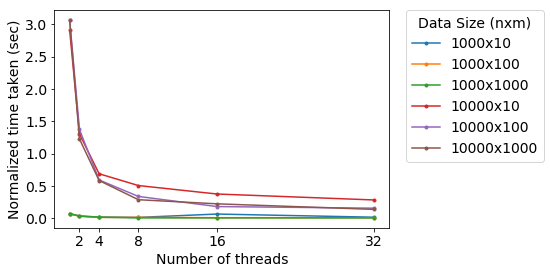

In [401]:
examples = df1_median['examples'].unique()
features = df1_median['features'].unique()
threads  = df1_median['threads'].unique()

for example in examples:
    for feature in features:
        time=[]
        for thread in threads:
            row = df1_median.loc[(df1_median['examples'] == example) &(df1_median['features'] == feature) &(df1_median['threads'] == thread)]['time_median']
            time.append(row.values)
        time = np.asarray(time)
        time = 10000*time/(example*feature)
        plt_label = "{}x{}".format(example,feature)
        plt.plot(threads,time,marker = '.',label=plt_label)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , title='Data Size (nxm)')
plt.ylabel("Normalized time taken (sec)")
plt.xlabel('Number of threads')

locs, labels = xticks()
xticks([1*2**i for i in range(1,6)])
plt.show()

In [422]:
gb = df.groupby(['examples','features','threads','classifier'])
df_median = gb.median().add_suffix('_median').reset_index()


In [437]:
gb = df2.groupby(['examples','features','threads','classifier'])
df2_median = gb.median().add_suffix('_median').reset_index()
df2_median[(df2_median['classifier']==5 )and (exa) and ()]

,examples,features,threads,classifier,sec_median,micro_median,time_median
0,1000,10,1,5,0.0,86041.0,0.086041
4,1000,10,2,5,0.0,43620.0,0.043620
6,1000,10,4,5,0.0,34691.0,0.034691
8,1000,10,8,5,0.0,27646.0,0.027646
10,1000,10,16,5,0.0,88771.0,0.088771
12,1000,10,32,5,0.0,19112.0,0.019112
14,1000,100,1,5,0.0,858058.5,0.858059
18,1000,100,2,5,0.0,433588.0,0.433588
20,1000,100,4,5,0.0,222851.0,0.222851
22,1000,100,8,5,0.0,222274.0,0.222274


In [420]:
split_val_df = df_median.loc[(df_median['examples'] == 10000) &(df_median['features'] == 1000)]
split_everything = df2_median.loc[(df2_median['examples'] == 10000) &(df2_median['features'] == 1000)]

/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


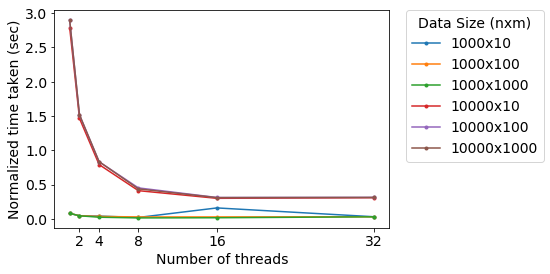

In [411]:
examples = df_median['examples'].unique()
features = df_median['features'].unique()
threads  = df_median['threads'].unique()

for example in examples:
    for feature in features:
        time=[]
        for thread in threads:
            row = df_median.loc[(df_median['examples'] == example) &(df_median['features'] == feature) &(df_median['threads'] == thread)]['time_median']
            time.append(row.values)
        time = np.asarray(time)
        time = 10000*time/(example*feature)
        plt_label = "{}x{}".format(example,feature)
        plt.plot(threads,time,marker = '.',label=plt_label)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , title='Data Size (nxm)')
plt.ylabel("Normalized time taken (sec)")
plt.xlabel('Number of threads')

locs, labels = xticks()
xticks([1*2**i for i in range(1,6)])
plt.show()

[]

/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


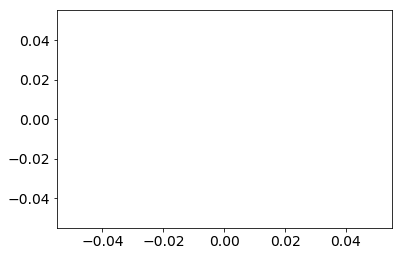

In [392]:
plt.plot()

In [314]:
df_median['features'].unique()


array([  10,  100, 1000])

In [201]:
df = pd.read_csv("data/output.csv", delimiter="\t", header=None,names=["sec","micro", "thread"])

df["time"] = df["sec"] + df["micro"] * 10**-6

gp = df.groupby('thread')['time']

s = 3062.309856

s1 = 74.147029

fig, ax = plt.subplots(figsize=(15, 10))
s = 8.421637
means = s/gp.median().sort_values(ascending=False)



plt.plot(df.thread.unique(),means.as_matrix(), color='green', linestyle='--', marker='o',
     markerfacecolor='blue', markersize=6, label='Parallel Data First Speedup', alpha=0.3)
ax.set_title("Speedup vs # of threads")
ax.set_xlabel("Threads")
ax.set_ylabel("Speedup")

plt.legend()

print(means,means1)

FileNotFoundError: File b'data/output.csv' does not exist